In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"files\h-data-3.csv")
df

,x1,x2,x3,y
0,35,71,74,137
1,82,82,76,-9
2,27,69,28,-76
3,57,93,31,-197
4,90,6,18,-169
...,...,...,...,...
95,74,72,52,-59
96,19,25,57,188
97,13,65,99,340
98,10,12,24,101


In [3]:
df_descride = df.describe()
df_descride

,x1,x2,x3,y
count,100.000000,100.000000,100.000000,100.000000
mean,49.500000,49.500000,49.500000,25.820000
std,29.011492,29.011492,29.011492,166.194931
min,0.000000,0.000000,0.000000,-326.000000
25%,24.750000,24.750000,24.750000,-97.000000
50%,49.500000,49.500000,49.500000,56.000000
75%,74.250000,74.250000,74.250000,134.500000
max,99.000000,99.000000,99.000000,426.000000


In [4]:
print(
	f"{df_descride.max().to_list()=}",
	f"{df_descride.min().to_list()=}",
	sep="\n"
)

df_descride.max().to_list()=[100.0, 100.0, 100.0, 426.0]
df_descride.min().to_list()=[0.0, 0.0, 0.0, -326.0]


In [5]:
columns = df.columns
columns

Index(['x1', 'x2', 'x3', 'y'], dtype='object')

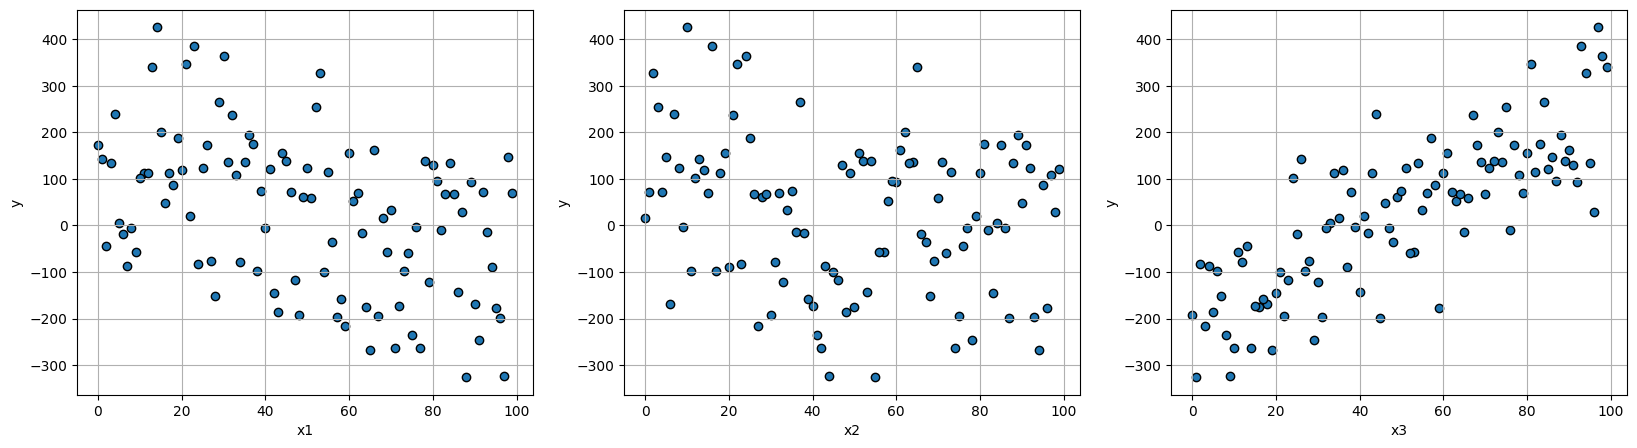

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

y = df[columns[-1]]
for i, column in enumerate(columns[:-1]):
	x = df[column]
	ax[i].set_xlabel(f"{column}")
	ax[i].set_ylabel("y")
	ax[i].scatter(x, y, edgecolor="black")
	ax[i].grid()

In [7]:
df_numpy = df.to_numpy()
x, y = df_numpy[:, :-1], df_numpy[:, -1]

In [8]:
model_T = LinearRegression().fit(x, y)
model_F = LinearRegression(fit_intercept=False).fit(x, y)

In [9]:
print(
	f"{model_T.score(x, y)=}",
	f"{model_F.score(x, y)=}",
	f"{model_T.coef_=}",
	f"{model_F.coef_=}",
	f"{model_T.intercept_=}",
	f"{model_F.intercept_=}",
	sep="\n"
	)

model_T.score(x, y)=0.9917497090589451
model_F.score(x, y)=0.9888412144025613
model_T.coef_=array([-2.98643528, -2.01313898,  4.95936874])
model_F.coef_=array([-2.80274681, -1.8351736 ,  5.10176288])
model_T.intercept_=np.float64(27.810173400268418)
model_F.intercept_=0.0


In [10]:
y_T, y_F = model_T.predict(x), model_F.predict(x)

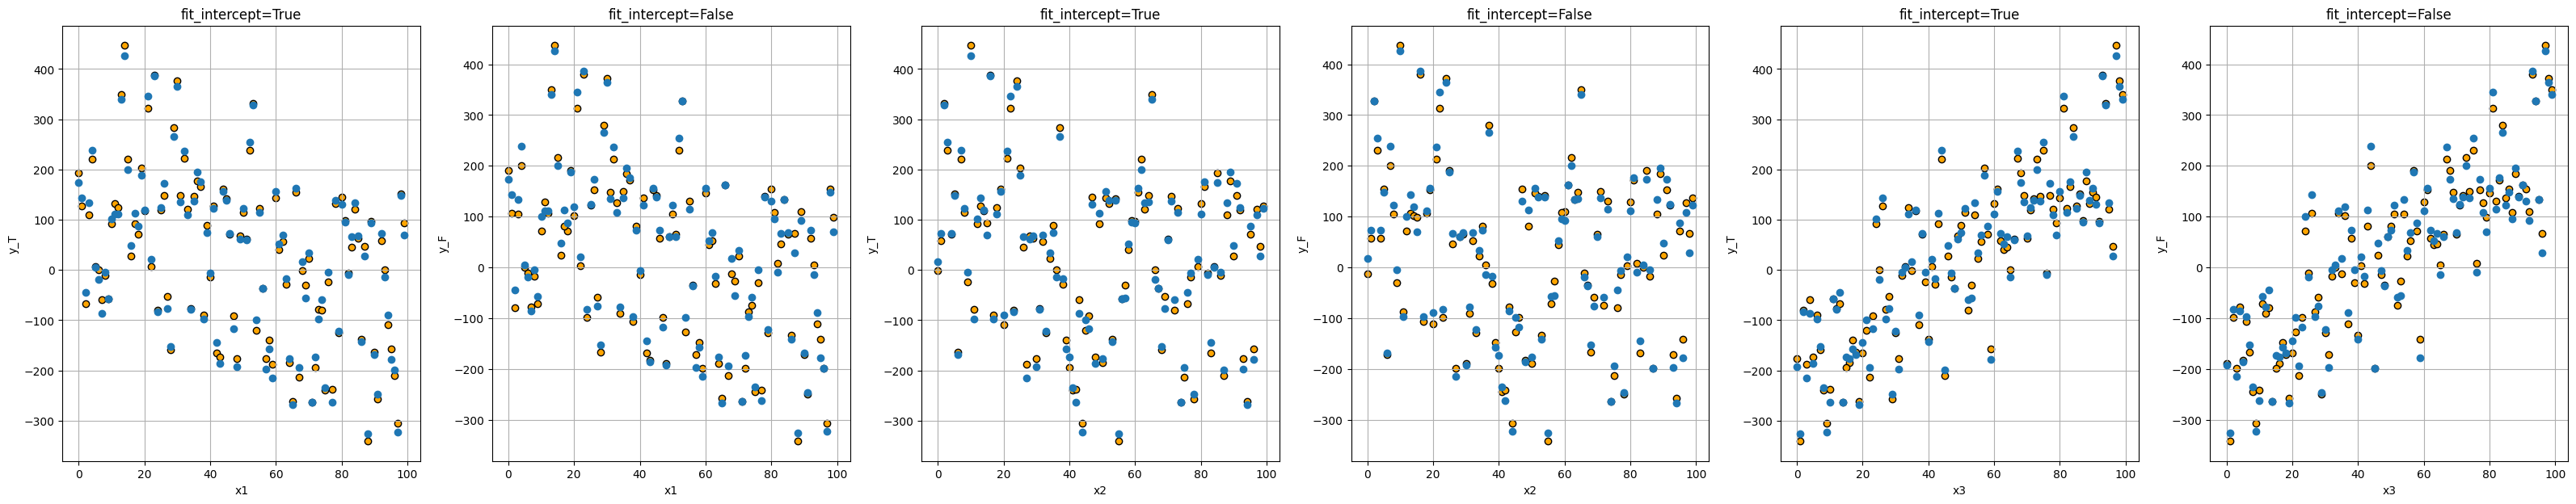

In [11]:
fig, ax = plt.subplots(1, 6, figsize=(40, 7))


for i, column in enumerate(columns[:-1]):
	x = df[column]
	ax[i * 2].set_title("fit_intercept=True")
	ax[i * 2].set_xlabel(f"{column}")
	ax[i * 2].set_ylabel("y_T")
	ax[i * 2].plot(x, y, "o", )
	ax[i * 2].scatter(x, y_T, c="orange", edgecolor="black")
	ax[i * 2].grid()
			
	ax[i * 2 + 1].set_title("fit_intercept=False")
	ax[i * 2 + 1].set_xlabel(f"{column}")
	ax[i * 2 + 1].set_ylabel("y_F")
	ax[i * 2 + 1].plot(x, y, "o")
	ax[i * 2 + 1].scatter(x, y_F, c="orange", edgecolor="black")
	ax[i * 2 + 1].grid()

In [12]:
x, y = df_numpy[:, :-1], df_numpy[:, -1]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
print(
	f"Размер тренировочной выборки: {x_train.shape}",
	f"Размер тестовой выборки: {x_test.shape}",
	sep="\n"
)

Размер тренировочной выборки: (80, 3)
Размер тестовой выборки: (20, 3)


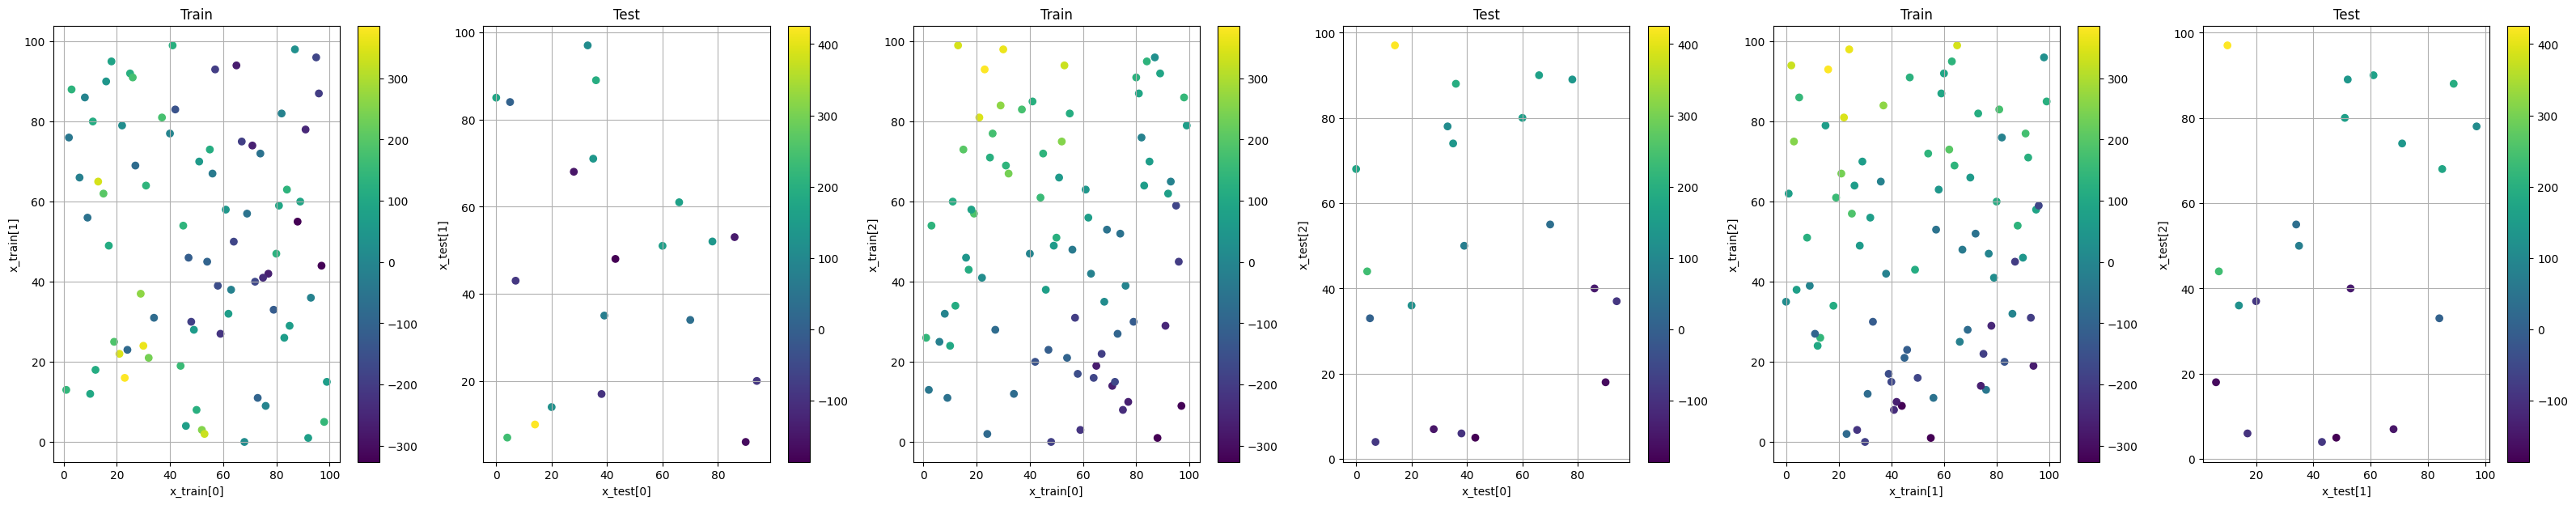

In [15]:
fig, ax = plt.subplots(1, 6, figsize=(40, 7))

x_train_test = {}
for i in range(len(columns) - 1):
	for j in range(i, len(columns) - 1):
		if i != j:
			x_train_test[f"x_train[{i}] x_train[{j}]"] = x_train[:, i], x_train[:, j]
			x_train_test[f"x_test[{i}] x_test[{j}]"] = x_test[:, i], x_test[:, j]


for i, data in enumerate(x_train_test.items()):
	k, v = data
	
	xlabel, ylabel = k.split()
	ax[i].set_xlabel(xlabel)
	ax[i].set_ylabel(ylabel)
	ax[i].grid()

	if not i % 2:
		s = ax[i].scatter(*v, c=y_train)
		ax[i].set_title("Train")

	else:
		s = ax[i].scatter(*v, c=y_test)
		ax[i].set_title("Test")

	plt.colorbar(s, ax=ax[i])